In [126]:
%matplotlib inline
import jieba
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

zhfont1 = matplotlib.font_manager.FontProperties(fname="/Library/Fonts/Microsoft/SimSun.ttf")

In [124]:
raw_data = pd.read_csv("../item.csv", header=None)
raw_data.columns = ["date", "title", "url"]
ymd = raw_data["date"].tolist()
ymd = pd.DataFrame(np.asarray([x.split('.') for x in ymd], dtype='int32'))
ymd.columns = ["year", "month", "day"]
data = pd.concat([ymd, data.iloc[:, 1:]], axis=1)
data = data[data.title.notnull()]

In [125]:
data["year"].value_counts()

2014    710
2013    510
2015    192
2016     60
Name: year, dtype: int64

In [155]:
# 抓取title中的单词
word_count = {}
for i in range(data.shape[0]):
    if i % 100 == 0:
        print(i)
    seg_list = "/".join(jieba.cut(data.title[i], cut_all=True)).split('/')
    for tmp in seg_list:
        if tmp not in word_count:
            word_count[tmp] = 1
        else:
            word_count[tmp] += 1

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400


In [231]:
# 词频最高的单词
word_df = pd.DataFrame.from_dict(word_count, orient="index")
word_df.columns = ["count"]
word_df = word_df.sort_values("count", ascending=False)
word_df[word_df["count"] >= 30]
# 发现谷歌被拆分成谷和歌两个单词
new_row = pd.Series(np.min([word_df[word_df.index == "歌"]["count"], word_df[word_df.index == "谷"]["count"]]) * 2,
                   name="谷歌", index=["count"])
word_df = word_df.append(new_row)

In [232]:
# 过滤一个字的单词
word_df = word_df[np.asarray(list(map(len, word_df.index))) > 1]
# 过滤outlier （中国, TechCrunch）
word_df = word_df.drop(word_df.index[[0, 1]])

<Container object of 50 artists>

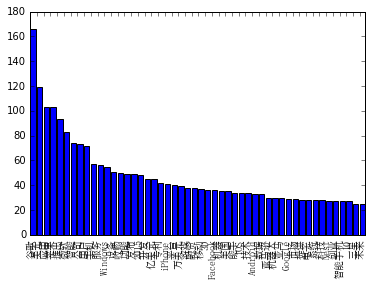

In [238]:
# 三年最热词汇
word_df = word_df.sort_values("count", ascending=False)
top = 50
x = range(top)
plt.figure(1)
plt.xticks(x, list(word_df.index[:top]), fontproperties=zhfont1)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.bar(x, word_df["count"][:top])

In [256]:
# 每年最热词汇
top = 30
years = [2014, 2015, 2016]
for year in years:
    print(year)
    sub_data = data[data["year"] == year]
    sub_word_count = {}
    for i in range(sub_data.shape[0]):
        seg_list = '/'.join(jieba.cut(list(sub_data.title)[i])).split('/')
        for tmp in seg_list:
            if tmp in sub_word_count:
                sub_word_count[tmp] += 1
            else:
                sub_word_count[tmp] = 1
    df = pd.DataFrame.from_dict(sub_word_count, orient="index")
    df.columns = ["counts"]
    df = df[np.asarray(list(map(len, df.index))) > 1]
    df = df.sort_values("counts", ascending=False)
    print(df.index[:top])

2014
Index(['中国', 'TechCrunch', '应用', '苹果', '推出', '公司', '谷歌', '微软', '用户', '功能',
       'Windows', '亿美元', '设备', '收购', '专利', '发布', '游戏', '服务', 'Nest', '技术',
       'iOS', '智能', '3D', '融资', '万美元', '移动', 'iPhone', '机器人', '平台', '美元'],
      dtype='object')
2015
Index(['中国', 'TechCrunch', '应用', '苹果', '2015', '推出', '谷歌', '旧金山', '公司', '用户',
       '微软', 'iPhone', '亚马逊', '未来', 'Galaxy', 'Android', '三星', 'TV', 'Google',
       '设备', '功能', 'Disrupt', '游戏', '平板', '销量', 'Uber', '支持', '数据',
       'September', '市场'],
      dtype='object')
2016
Index(['中国', 'TechCrunch', '2015', '新闻', '公司', '移动', '机器人', 'Facebook', '智能',
       '创业', '可能', '设备', '用户', '表现', '穿戴', '科技', '数字', 'Go', '因为', 'Bay',
       'Las', 'Vegas', '网页', '大会', '3D', '可以', '获取', 'One', 'Oculus', '最新'],
      dtype='object')
